In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import numpy as np
import os,sys
from sklearn.metrics import classification_report, confusion_matrix

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from os import system
from IPython.display import Image
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score



1. Load data set

In [2]:
df = pd.read_csv('Data - Parkinsons', delimiter=' *, *', engine='python')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [4]:
copy_df = df# dropping this column as it will be 1-1 mapping anyways
copy_df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [5]:
copy_df = copy_df.drop('name', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
copy_df.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [7]:
#Checking for missing value
copy_df.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No missing values

In [6]:
#General attributes of the data 
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

2. Observations:
It can be observed that the only status is categorical in the whole data set. 

In [9]:

copy_df.shape

(195, 24)

In [11]:
copy_df.describe().transpose()

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

2. Observations continued:
The following attribiutes are slightly right skewed as the central value(mean) is shifted little right than median. 'Fo','Fhi','Flo','Jitter(%)','Jitter(Abs)','RAP','PPQ','DDP','Shimmer','Shimmer(dB)','APQ3','APQ5','APQ','DDA','NHR'

The following attribiutes are slightly left skewed as the central value(mean) is shifted little left than median. 'HNR','spread1','spread2','D2','PPE'

The following atributes are occupying almost normally distributed cure as the mean and median have approx same values. 'RPDE','DFA'

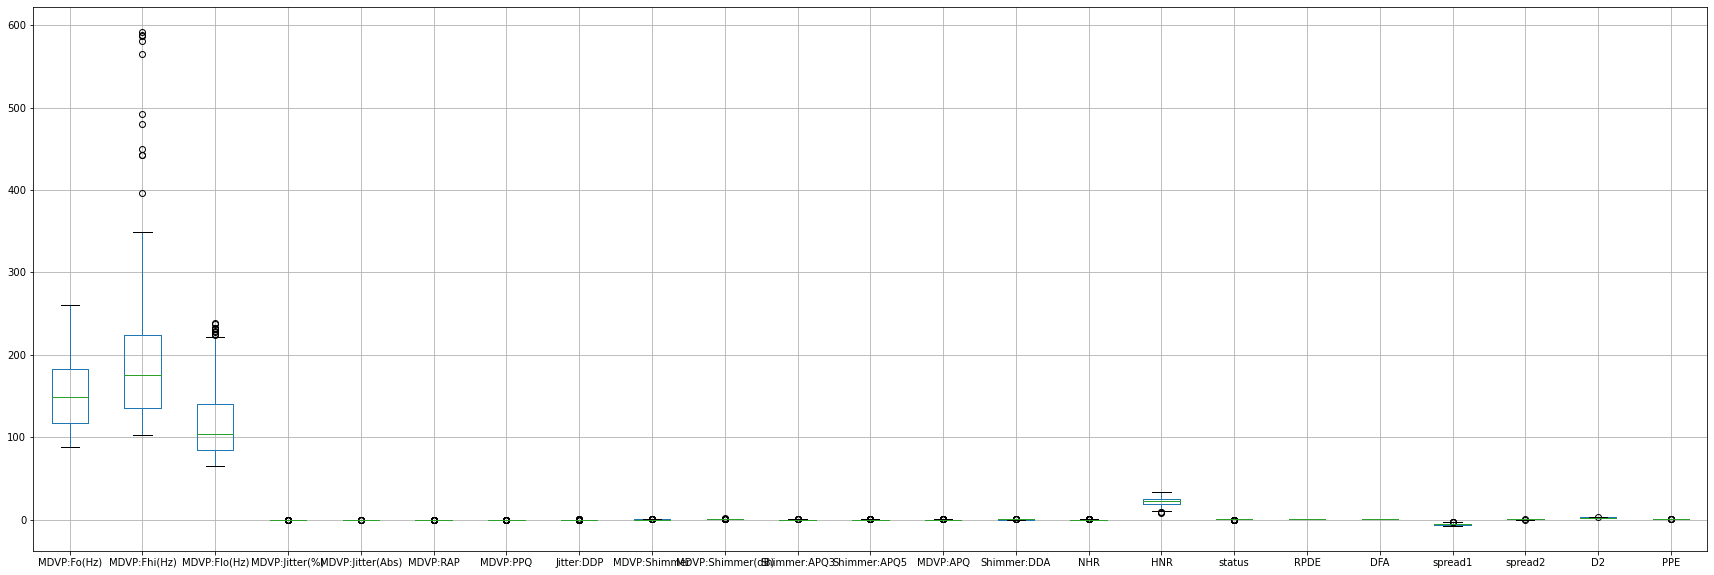

In [49]:
copy_df.boxplot(figsize=(30,10))

This box plots shows that there are less outliers. So, the model will not be much affected by the outliers. Though we see 'MVDP Fhi' has more outliers in comparison to the other attributes.

3. Uni variate and bivariate analysis

D:\Programfiles\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


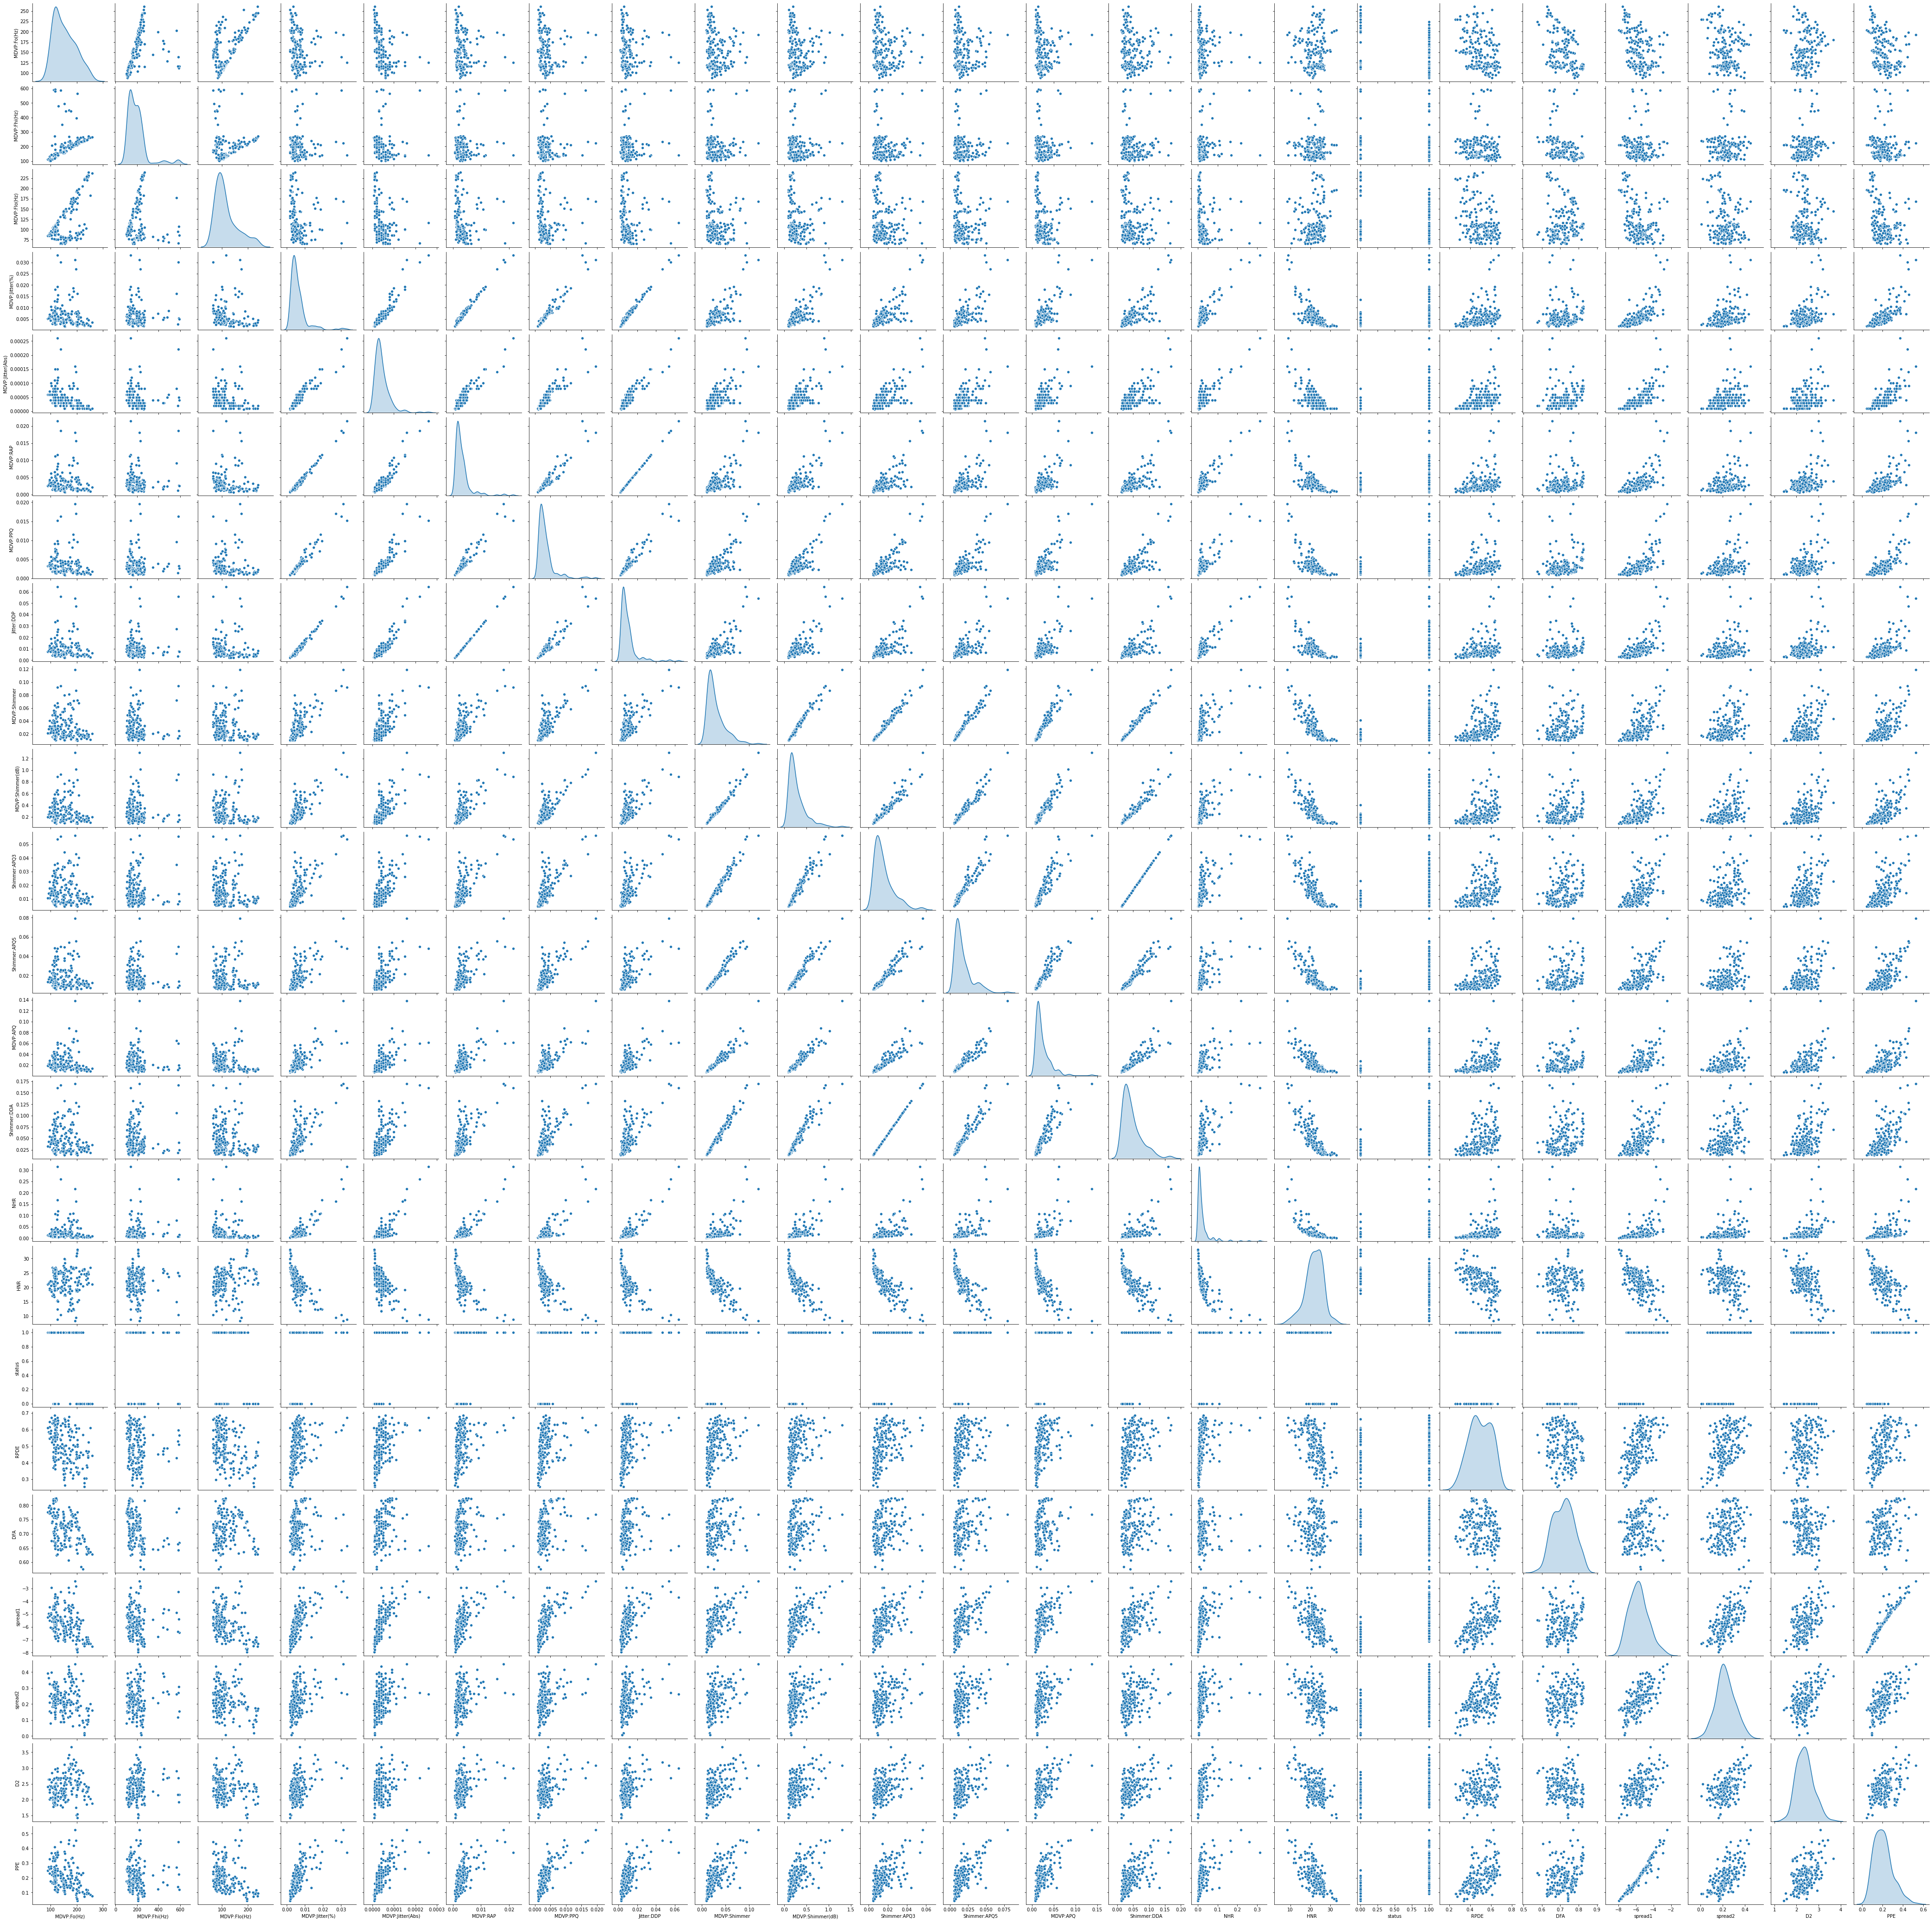

In [9]:
sns.pairplot(copy_df,diag_kind='kde')

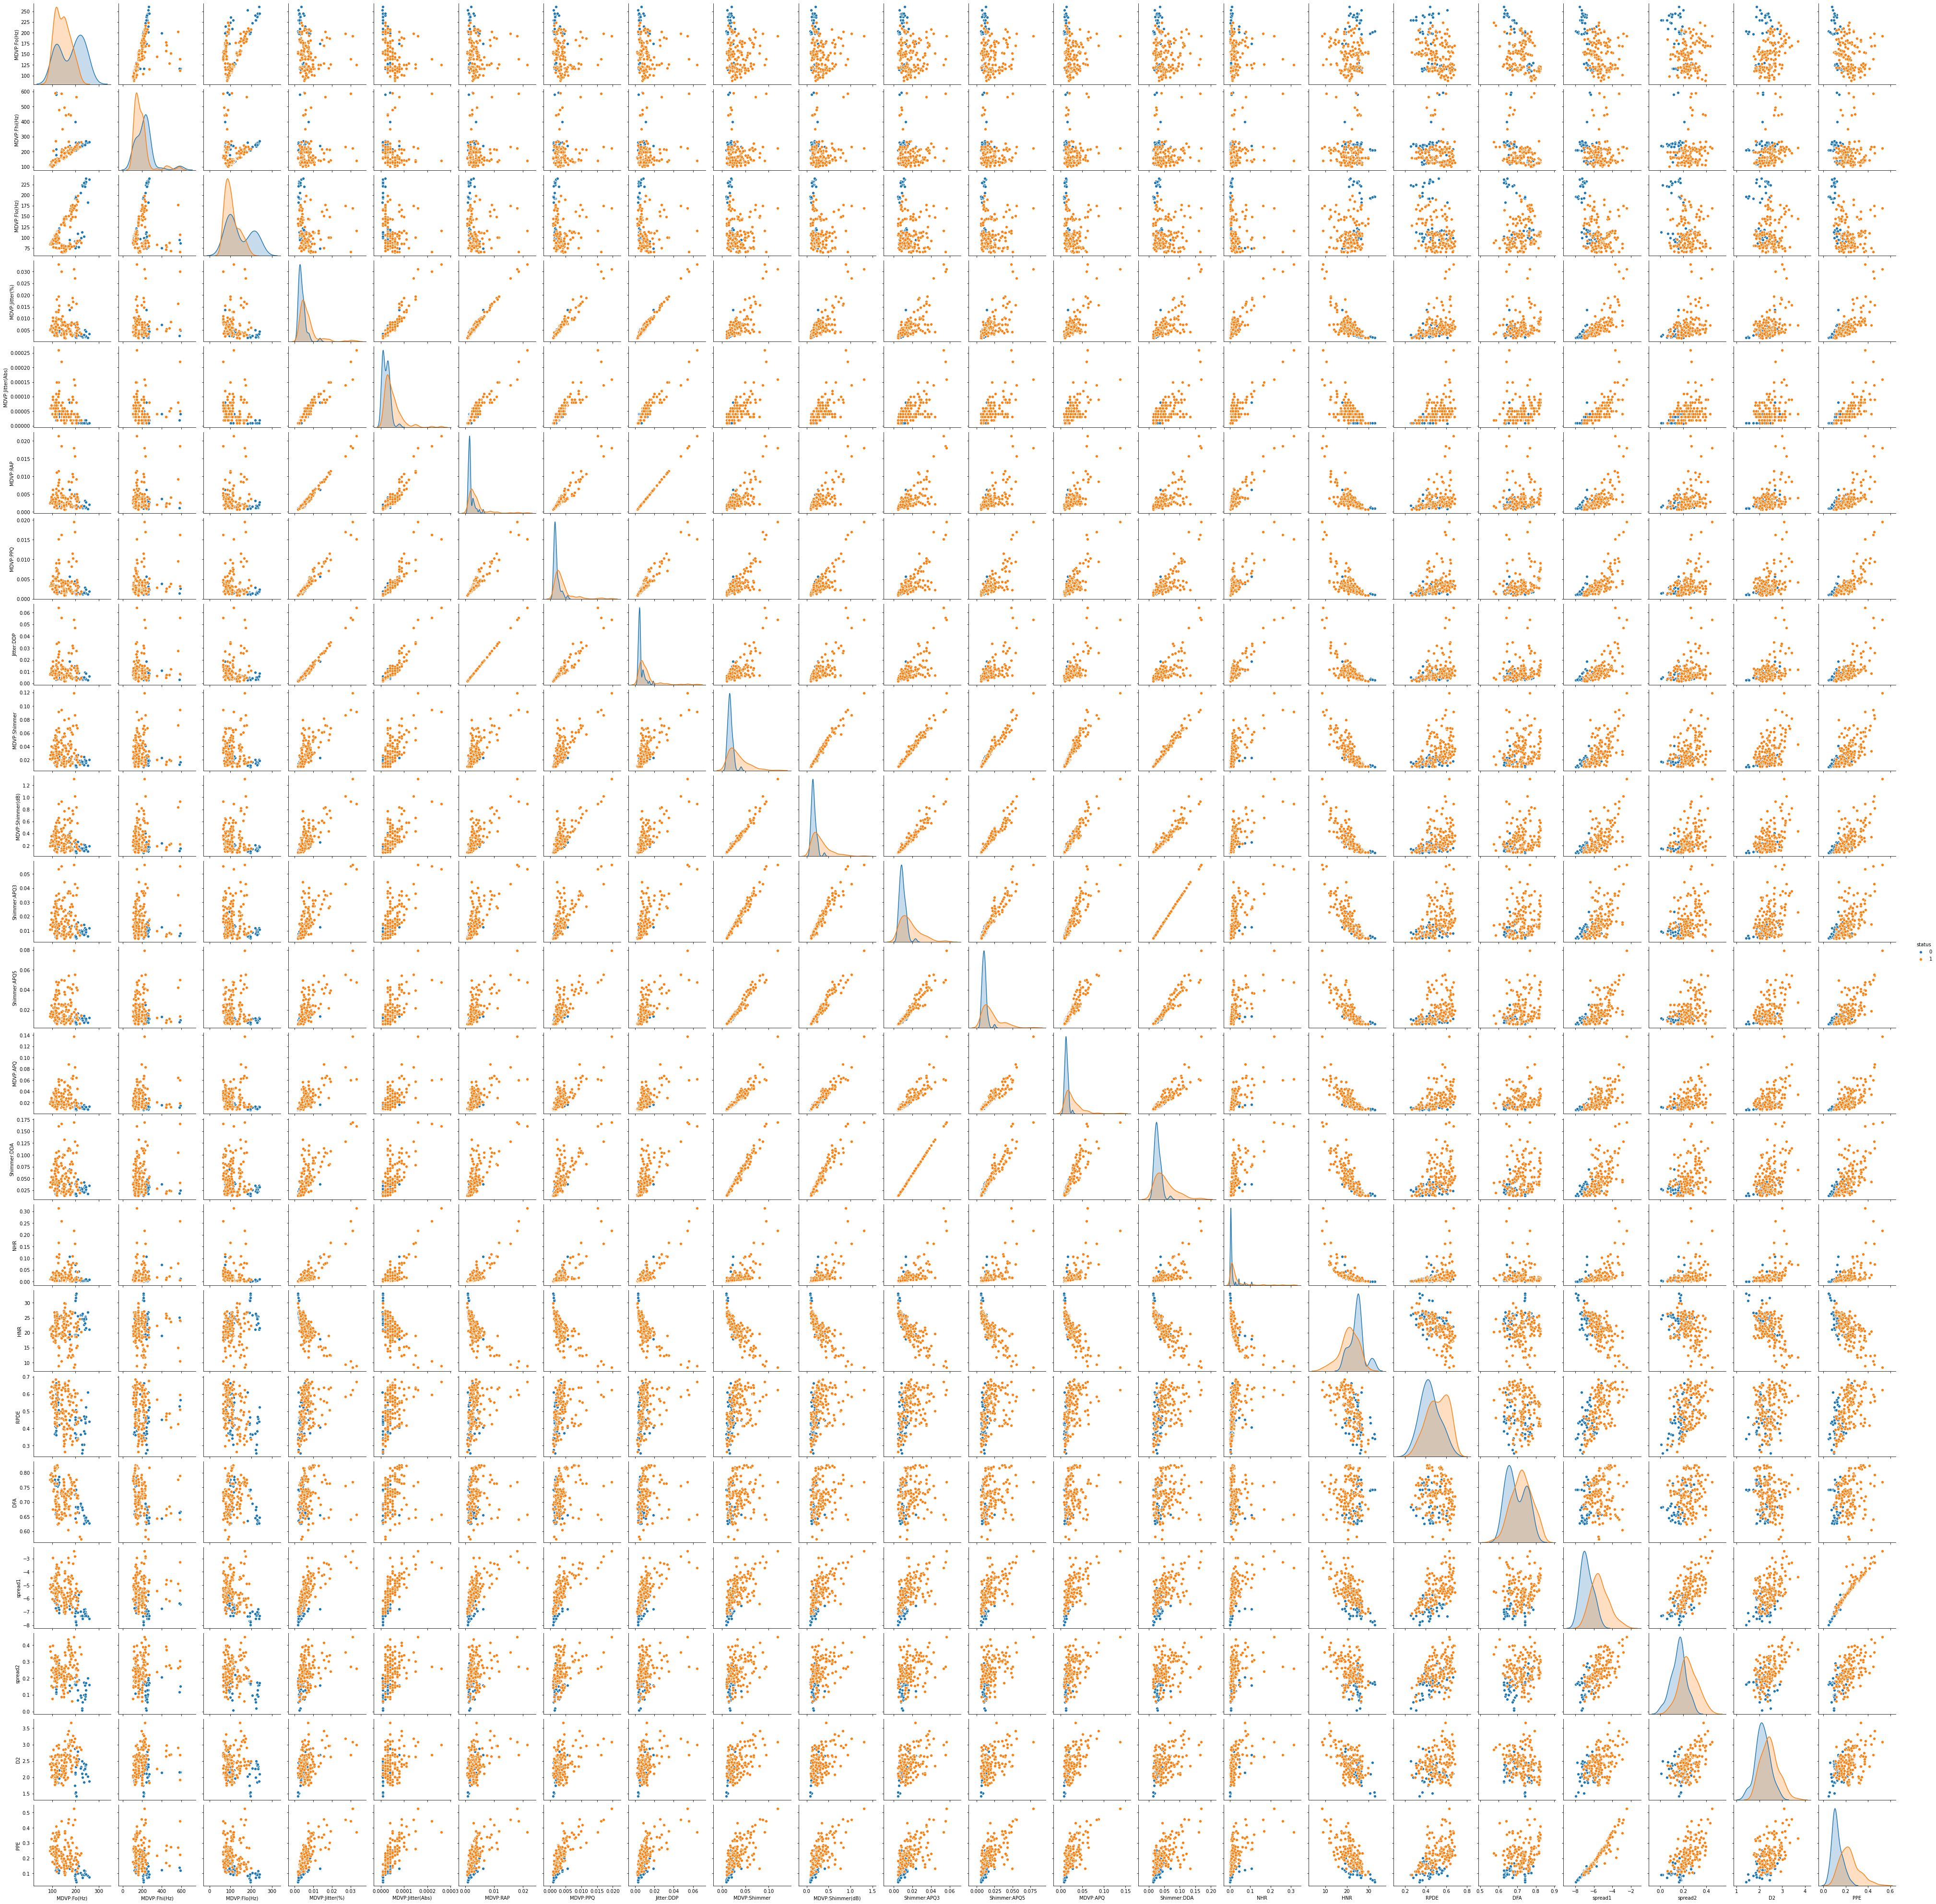

In [4]:
sns.pairplot(copy_df,diag_kind='kde',hue = "status")

The pairplot above shows variation for both healthy (BLUE) and people with Parkinson's Disease (ORANGE). Some variables have high correlation. Like DDP and RAP (corr = 1), and DDA and APQ3 (corr = 1). HNR seems to have high negative correlation with most of the variables

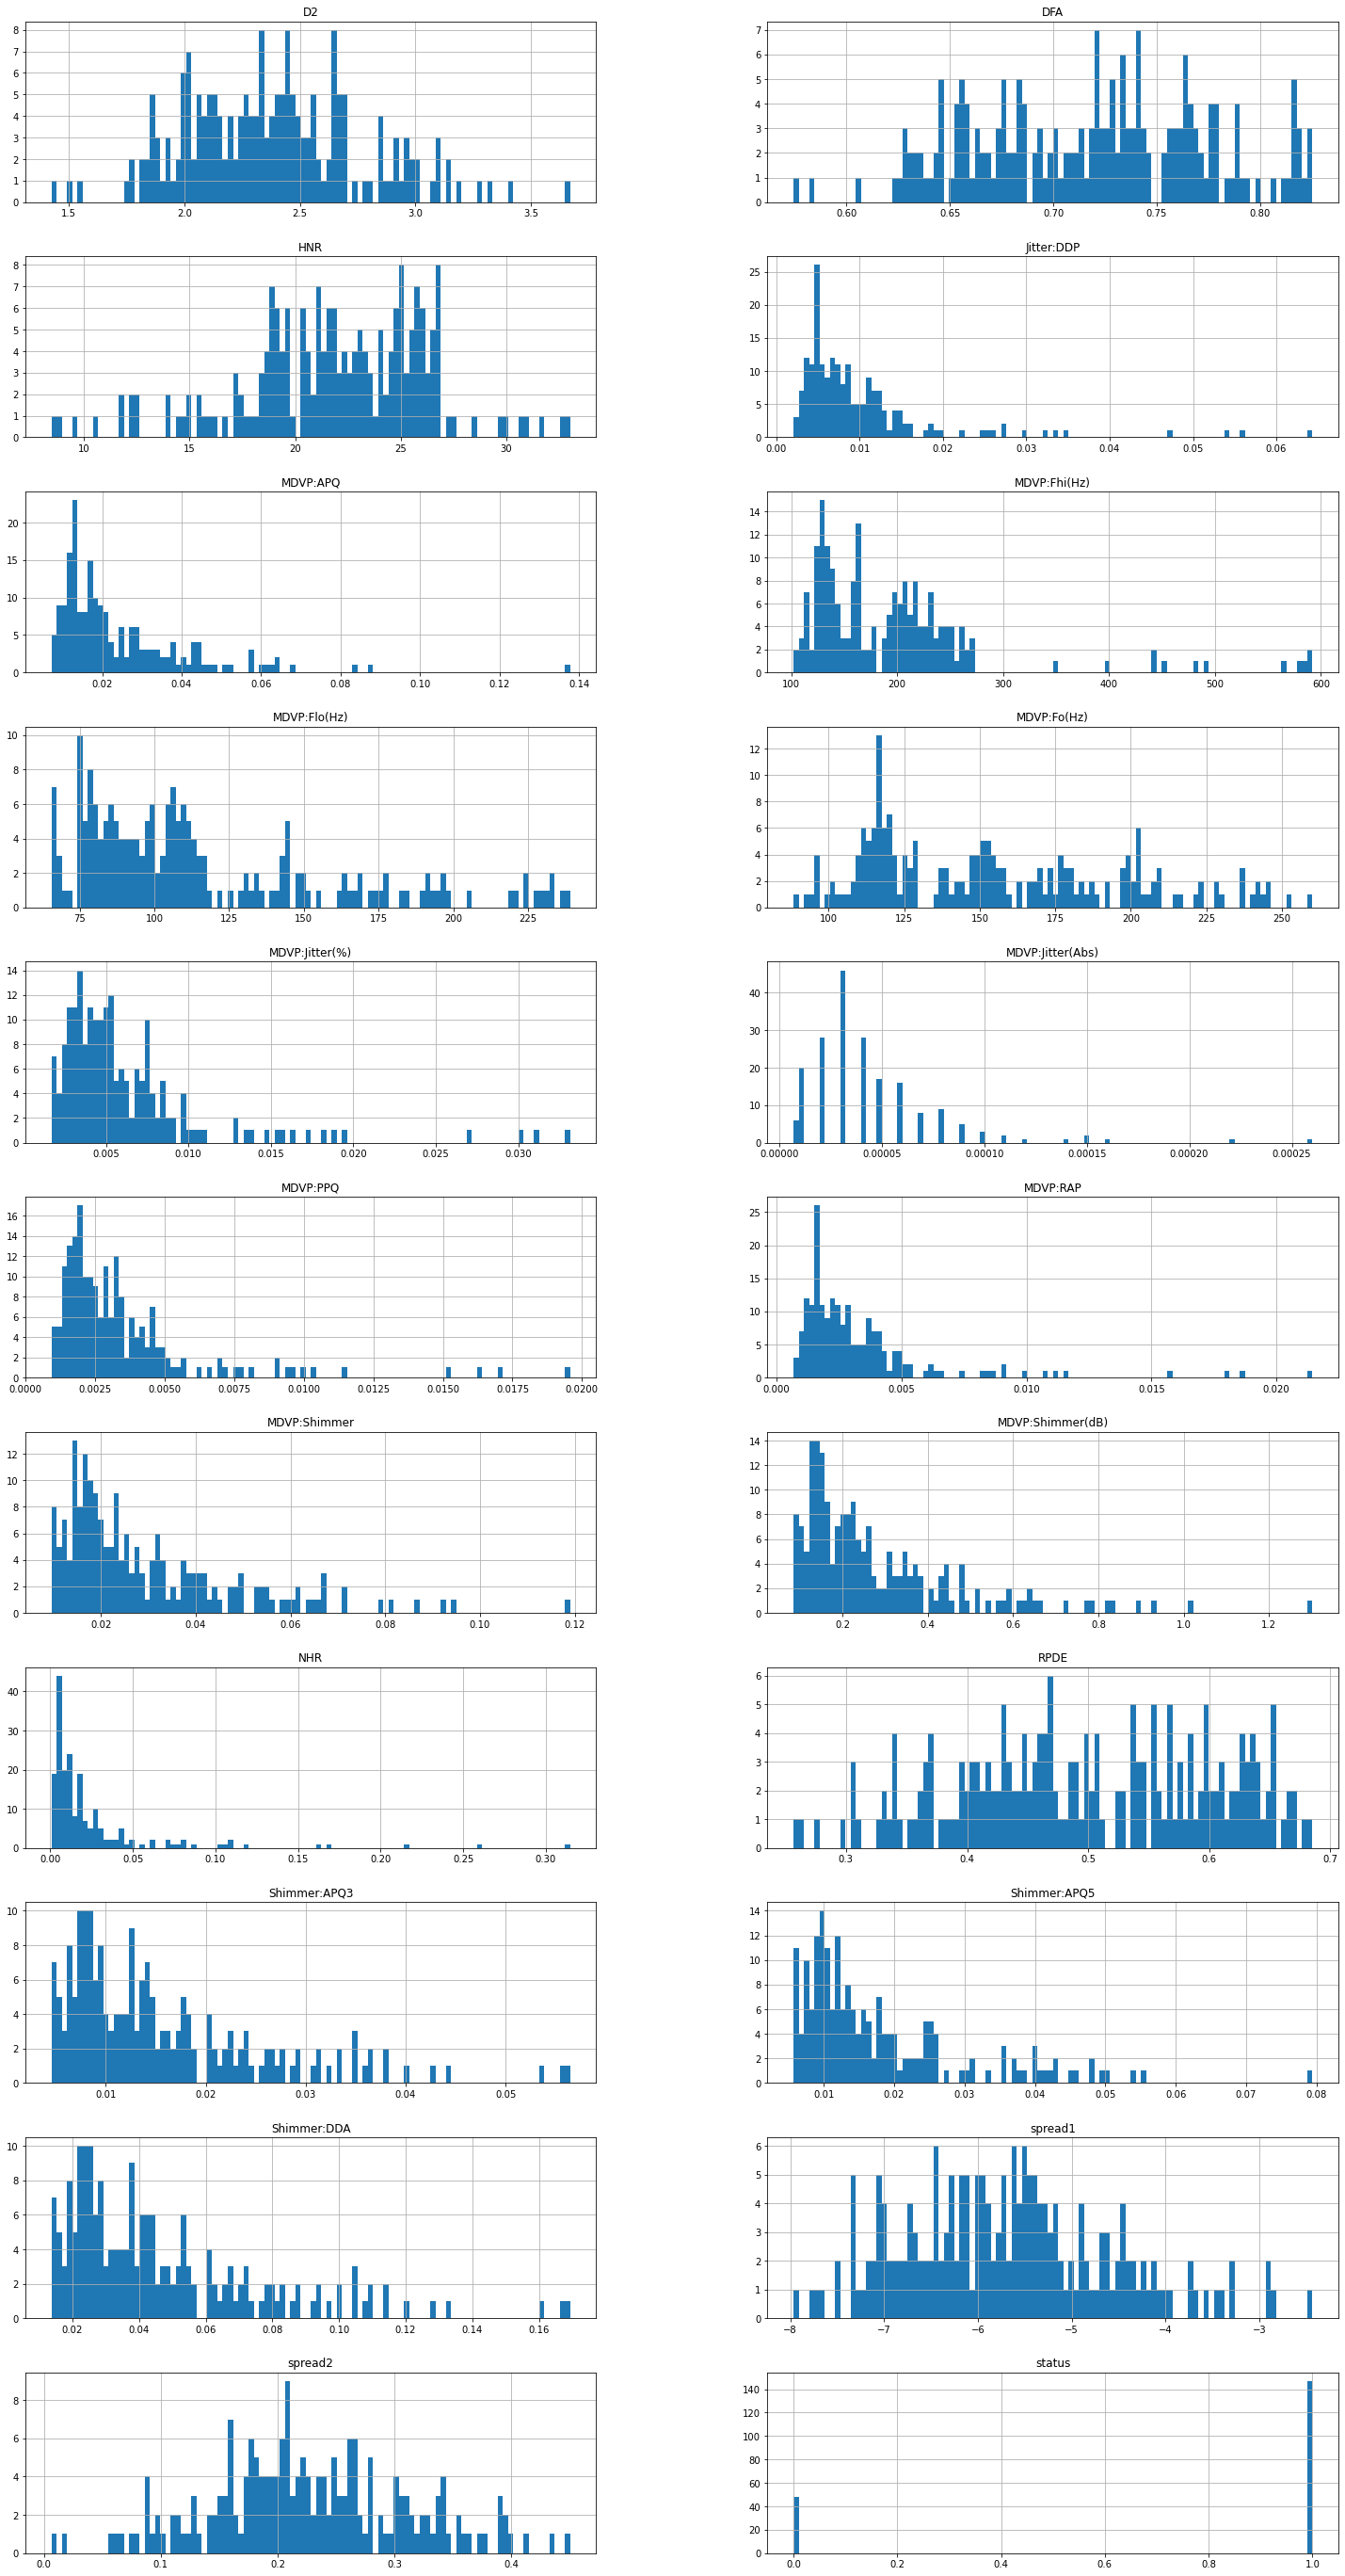

In [20]:
columns = list(copy_df)[0:-1] # Excluding Outcome column which has only 
copy_df[columns].hist(stacked=False, bins=100, figsize=(25,100), layout=(22,2)); 


In [21]:
copy_df.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  Shimmer:DDA       NHR  \
MDVP:Fo(Hz)          -0.098374         -0.073742  ...    -0.094732 -0.021981   
MDVP:Fhi(Hz)          0.002281          0.043465  ...    -0.003733  0.163766   
MDVP:Flo(Hz)         -0.144543         -0.119089  ...    -0.150737 -0.108670   
MDVP:Jitter(%)        0.769063          0.804289  ...     0.746635  0.906959   
MDVP:Jitter(Abs)      0.703322          0.716601  ...     0.697170  0.834972   
MDVP:RAP

In [23]:
def plot_corr(copy_df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

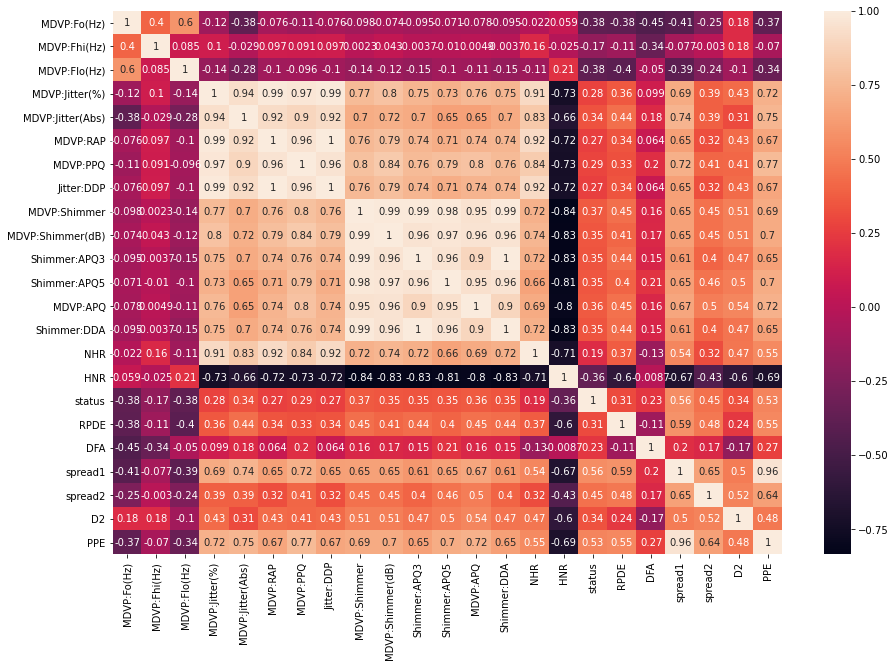

In [24]:
plt.figure(figsize = (15,10))
sns.heatmap(copy_df.corr(), annot = True )
#plot_corr(cr_df)

From the above table,we observe that 'MVDP Fhi'(Maximum vocal fundamental frequency) and 'NHR'(Measure of ratio of noise to tonal components in the voice) are having less correlation(-0.17 and 0.19 respectively). So, we can drop these two features based on their correlations

These attributes have very strong correlation among each other {0.99} approx equal to one. One among them can be dropped depending upon the impact in the target prediction.


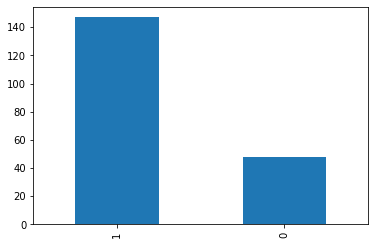

In [26]:
copy_df['status'].value_counts().plot(kind='bar')

In [27]:
copy_df.groupby(["status"]).mean()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                            
0        181.937771    223.636750    145.207292        0.003866   
1        145.180762    188.441463    106.893558        0.006989   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
status                                                                   
0               0.000023  0.001925  0.002056    0.005776      0.017615   
1               0.000051  0.003757  0.003900    0.011273      0.033658   

        MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA       NHR        HNR  \
status                    ...                                               
0               0.162958  ...  0.013305     0.028511  0.011483  24.678750   
1               0.321204  ...  0.027600     0.053027  0.029211  20.974048   

            RPDE       DFA   spread1   spread2        D2       PPE  
status                                                              
0       0.442552  0.695716 -6.759264  0.160292  2.154491  0.123017  
1       0.516816  0.725408 -5.333420  0.248133  2.456058  0.233828  

[2 rows x 22 columns]

This analysis shows that healthy people have high vocal fundamental frequency that people with Parkinson's Disease Patients. Variation in amplitude of healthy people are lower than people with Parkinson's Disease.

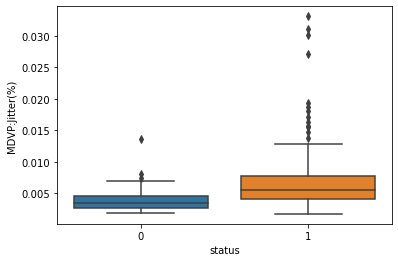

In [29]:
ax = sns.boxplot(y="MDVP:Jitter(%)", x="status", data=copy_df)

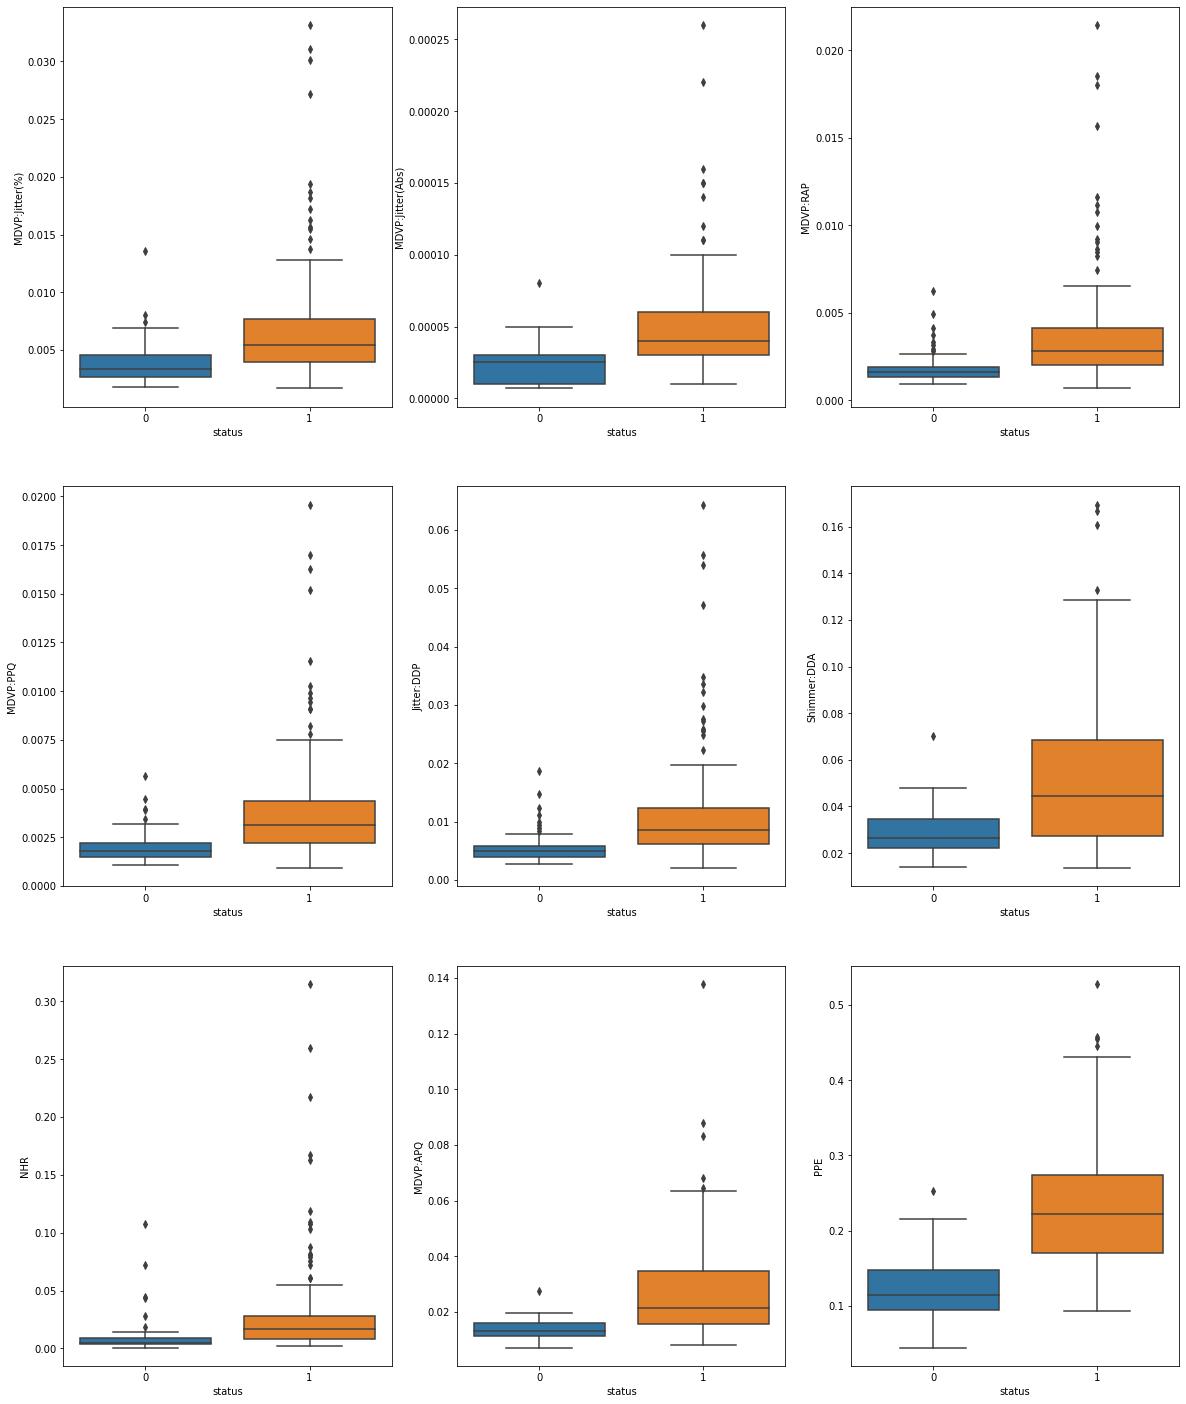

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt
fig, ax = plt.subplots(3, 3)
fig.set_figheight(25)
fig.set_figwidth(20)
sns.boxplot(y="MDVP:Jitter(%)", x="status", data=copy_df,ax=ax[0,0])
sns.boxplot(y="MDVP:Jitter(Abs)", x="status", data=copy_df,ax=ax[0,1])
sns.boxplot(y="MDVP:RAP", x="status", data=copy_df,ax=ax[0,2])
sns.boxplot(y="MDVP:PPQ", x="status", data=copy_df,ax=ax[1,0])
sns.boxplot(y="Jitter:DDP", x="status", data=copy_df,ax=ax[1,1])
sns.boxplot(y="Shimmer:DDA", x="status", data=copy_df,ax=ax[1,2])
sns.boxplot(y="NHR", x="status", data=copy_df,ax=ax[2,0])
sns.boxplot(y="MDVP:APQ", x="status", data=copy_df,ax=ax[2,1])
sns.boxplot(y="PPE", x="status", data=copy_df, ax=ax[2,2])

4. Splitting the data, 

In [7]:
X = (copy_df.drop(['status'], 1))
y = ((copy_df['status']))

In [30]:
X = copy_df.drop(['MDVP:Fhi(Hz)','NHR','MDVP:Jitter(%)','MDVP:Shimmer','status'],axis=1)
y = ((copy_df['status']))


In [9]:
from sklearn.model_selection import train_test_split

#X = copy_df.drop('status',axis=1)     # Predictor feature columns (8 X m)

#Y = copy_df['status']   # Predicted class (1=True, 0=False) (1 X m)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

#X_train.head()

In [10]:
# lets create a copy of the train and test data for scaling
X_Train_stand = X_train.copy()
X_Test_stand = X_test.copy()

Scaling the data

In [11]:
# we will use standard scaler for scaling the data.
scale = StandardScaler().fit(X_Train_stand)

In [12]:
X_train= scale.transform(X_Train_stand)
X_test= scale.transform(X_Test_stand)

In [13]:
X_train

array([[ 2.07198653,  2.53168424, -0.95171205, ..., -1.50340206,
         0.05817082, -1.27152628],
       [ 0.39318622, -1.01737916, -0.15878063, ...,  2.4793937 ,
         1.57297492,  2.42332906],
       [-0.78963612, -0.11165924,  0.89846126, ...,  0.87507728,
        -0.5298694 ,  1.61985132],
       ...,
       [-0.8012127 , -0.17283282, -0.4230911 , ...,  1.23049124,
        -0.48507865, -0.24647122],
       [ 0.4321836 , -0.92392283, -0.4230911 , ...,  2.04541018,
         1.46098777,  0.73345403],
       [ 0.57448724,  1.06904525, -0.68740157, ..., -0.34392557,
         0.3651429 , -0.41112182]])

In [14]:
if (pd.DataFrame(X_train).isnull().sum().any()==0):
    print('There are no null values in the training datset')
else:
    print('There are null values in the training datset')

if (pd.DataFrame(X_test).isnull().sum().any()==0):
    print('There are no null values in the test datset')
else:
    print('There are null values in the test datset')

There are no null values in the training datset
There are no null values in the test datset


In [15]:
#checking split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(copy_df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(copy_df.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [16]:
#original parkinsons value
print("Original Parkinsons True Values    : {0} ({1:0.2f}%)".format(len(copy_df.loc[copy_df['status'] == 1]), (len(copy_df.loc[copy_df['status'] == 1])/len(copy_df.index)) * 100))
print("Original Parkinsons False Values   : {0} ({1:0.2f}%)".format(len(copy_df.loc[copy_df['status'] == 0]), (len(copy_df.loc[copy_df['status'] == 0])/len(copy_df.index)) * 100))
print("")
print("Training Parkinsons True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Parkinsons False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Parkinsons True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Parkinsons False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Parkinsons True Values    : 147 (75.38%)
Original Parkinsons False Values   : 48 (24.62%)

Training Parkinsons True Values    : 107 (78.68%)
Training Parkinsons False Values   : 29 (21.32%)

Test Parkinsons True Values        : 40 (67.80%)
Test Parkinsons False Values       : 19 (32.20%)



There are no missing values for the training data set

Building any three modeles:

In [17]:
#Build Logistic Model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.89


In [20]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.80


In [21]:
#Confusion Matrix for Logistic regression

from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10  9]
 [ 3 37]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.53      0.62        19
           1       0.80      0.93      0.86        40

    accuracy                           0.80        59
   macro avg       0.79      0.73      0.74        59
weighted avg       0.79      0.80      0.78        59



In [24]:
y_pred = logreg.predict(X_test)

In [25]:
#Build KNN model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
print('Accuracy of KNN on train set: {:.2f}'.format(classifier.score(X_train, y_train)))

Accuracy of KNN on train set: 0.96


In [28]:
print('Accuracy of KNN on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of KNN on test set: 0.88


Confusion Matrix


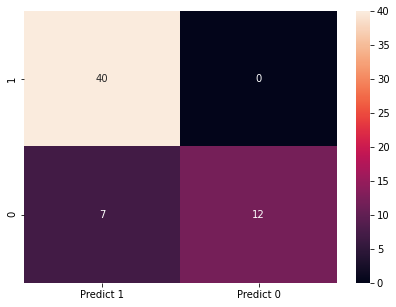

In [32]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



Naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
parkinNB_model = GaussianNB()

parkinNB_model.fit(X_train, y_train.ravel())

GaussianNB()

In [34]:
park_train_predict = parkinNB_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, park_train_predict)))
print()

Model Accuracy: 0.7206



In [35]:
park_test_predict = parkinNB_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, park_test_predict)))
print()

Model Accuracy: 0.7119



Confusion Matrix


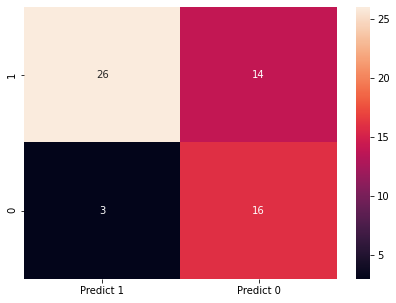

In [36]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, park_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.47      0.60        19
           1       0.79      0.95      0.86        40

    accuracy                           0.80        59
   macro avg       0.80      0.71      0.73        59
weighted avg       0.80      0.80      0.78        59



In [37]:
from sklearn import svm

svm = svm.SVC(gamma = 0.025, C = 3)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)
predicted = svm.predict(X_test)
accuracy = (metrics.accuracy_score(y_test, predicted))*100
#accuracies['SVM'] = accuracy
print('Support Vector Machines accuracy: ', accuracy)
print('Confusion Matrix: ')
print(metrics.confusion_matrix(y_test, predicted))

Support Vector Machines accuracy:  83.05084745762711
Confusion Matrix: 
[[ 9 10]
 [ 0 40]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.85      1.00      0.92        40

    accuracy                           0.88        59
   macro avg       0.93      0.82      0.85        59
weighted avg       0.90      0.88      0.87        59



Meta Classifier Model 2: Stacking Classifier from SKLearn

The estimators chosen were Random forest classifier, Logistic Regression and KNN. For the classifier, Random Forest Classifier was chosen. 

In [59]:
estimators = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)),
   ('lr', LogisticRegression(solver="liblinear")),
    ('knn',KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )),
   # ('XGB',XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3))
]

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

clf = StackingClassifier(
    estimators=estimators, final_estimator=RandomForestClassifier()
)

In [61]:
model = clf.fit(X_train, y_train)
y_predict_Stack = model.predict(X_test)

In [62]:
print('The accuracy of the meta classifier 2 is: [%.8f]' % accuracy_score(y_test, y_predict_Stack))

The accuracy of the meta classifier 2 is: [0.94915254]


Confusion Matrix - Meta Classifer 


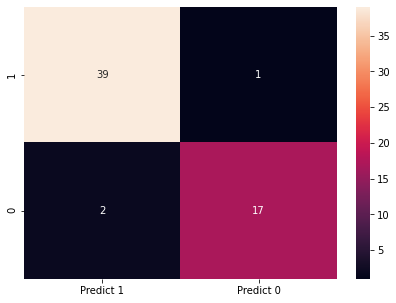

In [63]:
print("Confusion Matrix - Meta Classifer ")
cm=metrics.confusion_matrix(y_test, y_predict_Stack, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [64]:
print("Classification Report - Meta-Classifier ")
print(metrics.classification_report(y_test, y_predict_Stack, labels=[1, 0]))

Classification Report - Meta-Classifier 
              precision    recall  f1-score   support

           1       0.95      0.97      0.96        40
           0       0.94      0.89      0.92        19

    accuracy                           0.95        59
   macro avg       0.95      0.93      0.94        59
weighted avg       0.95      0.95      0.95        59



Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

Ensemble Model 1: Random Forest


In [39]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
model_rf = model_rf.fit(X_train, y_train)

In [40]:
y_predict_rf = model_rf.predict(X_test)
print(model_rf.score(X_test, y_test))

0.8305084745762712


Confusion Matrix -Random Forest


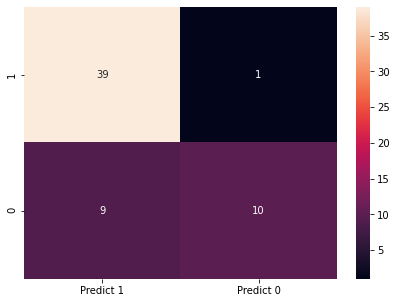

In [41]:
print("Confusion Matrix -Random Forest")
cm=metrics.confusion_matrix(y_test, y_predict_rf, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Random Forest

True Positives (TP):39

True Negatives (TN): 10

False Positives (FP): 9

False Negatives (FN): 1

In [42]:
#Classification Report: Random Forest
print("Classification Report - Random Forest")
print(metrics.classification_report(y_test, y_predict_rf, labels=[1, 0]))

Classification Report - Random Forest
              precision    recall  f1-score   support

           1       0.81      0.97      0.89        40
           0       0.91      0.53      0.67        19

    accuracy                           0.83        59
   macro avg       0.86      0.75      0.78        59
weighted avg       0.84      0.83      0.82        59



In [43]:
#Ensemble Model 2: Bagging
bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [44]:
y_predict_bag = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))

0.847457627118644


Confusion Matrix -Bagging Classifier


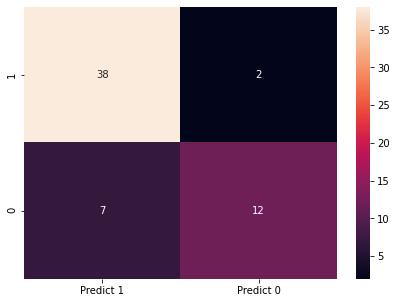

In [45]:
#Confusion Matrix: Bagging Classifier
print("Confusion Matrix -Bagging Classifier")
cm=metrics.confusion_matrix(y_test, y_predict_bag, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Bagging Classifier

True Positives (TP):  38

True Negatives (TN): 12

False Positives (FP):  2

False Negatives (FN):  7

In [46]:
print("Classification Report - Bagging Classifier")
print(metrics.classification_report(y_test, y_predict_bag, labels=[1, 0]))

Classification Report - Bagging Classifier
              precision    recall  f1-score   support

           1       0.84      0.95      0.89        40
           0       0.86      0.63      0.73        19

    accuracy                           0.85        59
   macro avg       0.85      0.79      0.81        59
weighted avg       0.85      0.85      0.84        59



In [47]:
#Ensemble Model 3: Ada Boost
AdaBC = AdaBoostClassifier(n_estimators=50, random_state=1)
AdaBC = AdaBC.fit(X_train, y_train)

In [48]:
y_predict_ada = AdaBC.predict(X_test)
print(AdaBC.score(X_test , y_test))

0.8813559322033898


Confusion Matrix -Ada Boost


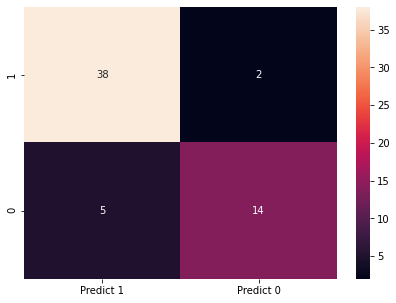

In [49]:
print("Confusion Matrix -Ada Boost")
cm=metrics.confusion_matrix(y_test, y_predict_ada, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Ada Boost

True Positives (TP):  38

True Negatives (TN): 14

False Positives (FP):5

False Negatives (FN): 2

In [50]:
#Classification Report: Ada Boost
print("Classification Report - Ada Boost")
print(metrics.classification_report(y_test, y_predict_ada, labels=[1, 0]))

Classification Report - Ada Boost
              precision    recall  f1-score   support

           1       0.88      0.95      0.92        40
           0       0.88      0.74      0.80        19

    accuracy                           0.88        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.88      0.88      0.88        59



Comparison of all models accuracy:
Supervised learning techniques
Logistic regression: 0.80
KNN: 0.88
Naive Bayes: 0.71
SVM: 0.83
It is observed that SVM has the best score in terms of accuracy, when compared to all the supervised learning techniques.
Ensemble techniques:
The accuracy for 
Random forest: 0.83
Bagging= 0.85
Boosting =0.88
Meta CLasifier =0.95
It was seen that the meta classifier was the the best model in terms of accuracy and recall.
